In [ ]:
##Name:Anup Dangi
##ID:2333319
##Group:L6CG7

In [ ]:
!pip install gensim

Libraries required

In [ ]:
##Importing all required libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df='/content/drive/MyDrive/Artificial Intelligence and machine learning/2. Hotel Review Dataset/Hotel_Reviews.csv'


In [ ]:
data = pd.read_csv(df)

Total no of reviews in dataset

In [ ]:
from collections import Counter
total_reviews = len(data)
print(f"Total Reviews: {total_reviews}")

Total Reviews: 20491


In [ ]:
if 'Rating' in data.columns:
    class_counts = data['Rating'].value_counts()
    print("\nClass Distribution:")
    print(class_counts)
    print(f"\nNumber of Classes: {len(class_counts)}")
else:
    print("\nNo sentiment class column found")


Class Distribution:
Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

Number of Classes: 5


In [ ]:
# Checking whether there are any null values or not
data.isnull().sum()

,0
Review,0
Rating,0


In [ ]:
sample_reviews = data['Review'].head().tolist()

Lowercase all text to ensure uniformity.

In [ ]:
def lowercase_text(text):
    return text.lower()

print("\n1. Lowercasing Results:")
lowercased = [lowercase_text(review) for review in sample_reviews]
for orig, lower in zip(sample_reviews, lowercased):
    print(f"Original: {orig[:50]}...")
    print(f"Lowercased: {lower[:50]}...\n")


1. Lowercasing Results:
Original: nice hotel expensive parking got good deal stay ho...
Lowercased: nice hotel expensive parking got good deal stay ho...

Original: ok nothing special charge diamond member hilton de...
Lowercased: ok nothing special charge diamond member hilton de...

Original: nice rooms not 4* experience hotel monaco seattle ...
Lowercased: nice rooms not 4* experience hotel monaco seattle ...

Original: unique, great stay, wonderful time hotel monaco, l...
Lowercased: unique, great stay, wonderful time hotel monaco, l...

Original: great stay great stay, went seahawk game awesome, ...
Lowercased: great stay great stay, went seahawk game awesome, ...



Testing the result for lowercase

In [ ]:
def lowercase_text(text):
    return text.lower()

print(" Lowercasing Test:")
sample_lower = ["This is A SAMPLE Review!", "Another REVIEW with CAPS."]
for review in sample_lower:
    lower = lowercase_text(review)
    print(f"Original: {review}")
    print(f"Lowercased: {lower}\n")

 Lowercasing Test:
Original: This is A SAMPLE Review!
Lowercased: this is a sample review!

Original: Another REVIEW with CAPS.
Lowercased: another review with caps.



# 2. Remove URLs, mentions, hashtags, numbers, special characters

In [ ]:
def remove_noise(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

print("\. Noise Removal Results:")
noise_removed = [remove_noise(review) for review in lowercased]
for before, after in zip(lowercased, noise_removed):
    print(f"Before: {before[:50]}...")
    print(f"After: {after[:50]}...\n")

\. Noise Removal Results:
Before: nice hotel expensive parking got good deal stay ho...
After: nice hotel expensive parking got good deal stay ho...

Before: ok nothing special charge diamond member hilton de...
After: ok nothing special charge diamond member hilton de...

Before: nice rooms not 4* experience hotel monaco seattle ...
After: nice rooms not  experience hotel monaco seattle go...

Before: unique, great stay, wonderful time hotel monaco, l...
After: unique great stay wonderful time hotel monaco loca...

Before: great stay great stay, went seahawk game awesome, ...
After: great stay great stay went seahawk game awesome do...



testing for removing the noise

In [ ]:
def remove_noise(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

print(" Noise Removal Test:")
sample_noise = ["Check out http://anupdangi.com!", "Hello @user #hashtag!", "Buy now for $9.99!!!"]
for review in sample_noise:
    cleaned = remove_noise(review)
    print(f"Original: {review}")
    print(f"Cleaned: {cleaned}\n")

 Noise Removal Test:
Original: Check out http://anupdangi.com!
Cleaned: Check out 

Original: Hello @user #hashtag!
Cleaned: Hello  

Original: Buy now for $9.99!!!
Cleaned: Buy now for 



 #3. Handle contractions

In [ ]:
contractions_map = {
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'ve": " have",
    "'m": " am"
}

def expand_contractions(text):
    for contraction, expansion in contractions_map.items():
        text = text.replace(contraction, expansion)
    return text

print("Contraction Handling Results:")
contractions_expanded = [expand_contractions(review) for review in noise_removed]
for before, after in zip(noise_removed, contractions_expanded):
    print(f"Before: {before[:50]}...")
    print(f"After: {after[:50]}...\n")

Contraction Handling Results:
Before: nice hotel expensive parking got good deal stay ho...
After: nice hotel expensive parking got good deal stay ho...

Before: ok nothing special charge diamond member hilton de...
After: ok nothing special charge diamond member hilton de...

Before: nice rooms not  experience hotel monaco seattle go...
After: nice rooms not  experience hotel monaco seattle go...

Before: unique great stay wonderful time hotel monaco loca...
After: unique great stay wonderful time hotel monaco loca...

Before: great stay great stay went seahawk game awesome do...
After: great stay great stay went seahawk game awesome do...



In [ ]:
contractions_map = {
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'ve": " have",
    "'m": " am"
}

def expand_contractions(text):
    for contraction, expansion in contractions_map.items():
        text = text.replace(contraction, expansion)
    return text

print("\ Contraction Expansion Test:")
sample_contractions = ["I cannot believe it's happening.", "You're going to win!", "She'd love to come."]
for review in sample_contractions:
    expanded = expand_contractions(review)
    print(f"Original: {review}")
    print(f"Expanded: {expanded}\n")

\ Contraction Expansion Test:
Original: I cannot believe it's happening.
Expanded: I cannot believe it is happening.

Original: You're going to win!
Expanded: You are going to win!

Original: She'd love to come.
Expanded: She would love to come.



4. Remove stopwords and lemmatize

In [ ]:
from nltk.stem import WordNetLemmatizer
def lemmatize_and_remove_stopwords(text):
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    filtered = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

print(" Stopword Removal & Lemmatization Results:")
final_cleaned = [lemmatize_and_remove_stopwords(review) for review in contractions_expanded]
for before, after in zip(contractions_expanded, final_cleaned):
    print(f"Before: {before[:50]}...")
    print(f"After: {after[:50]}...\n")

 Stopword Removal & Lemmatization Results:
Before: nice hotel expensive parking got good deal stay ho...
After: nice hotel expensive parking got good deal stay ho...

Before: ok nothing special charge diamond member hilton de...
After: ok nothing special charge diamond member hilton de...

Before: nice rooms not  experience hotel monaco seattle go...
After: nice room experience hotel monaco seattle good hot...

Before: unique great stay wonderful time hotel monaco loca...
After: unique great stay wonderful time hotel monaco loca...

Before: great stay great stay went seahawk game awesome do...
After: great stay great stay went seahawk game awesome do...



testing the stopword removal and lemmatization

In [ ]:
def lemmatize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return ' '.join(lemmatized)

print("\n4. Stopword Removal & Lemmatization Test:")
sample_lemmatization = ["The cats are playing in the gardens.", "He was running and jumping!"]
for review in sample_lemmatization:
    processed = lemmatize_and_remove_stopwords(review)
    print(f"Original: {review}")
    print(f"Processed: {processed}\n")


4. Stopword Removal & Lemmatization Test:
Original: The cats are playing in the gardens.
Processed: The cat playing garden .

Original: He was running and jumping!
Processed: He running jumping !



Visualize the cleaned data:

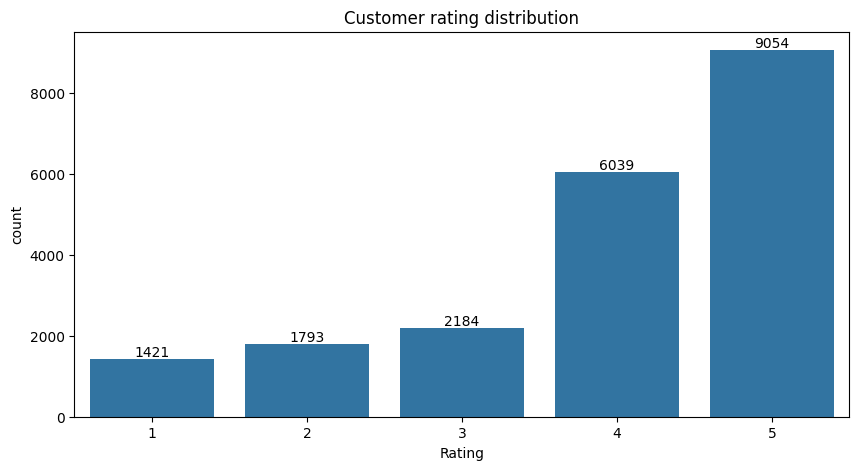

In [ ]:
#Visualizing the total number of ratings from 1-5 categorically in a subplot
# Defining the figure type and its side
fig, ax = plt.subplots(figsize=(10, 5))
# Providing the column to derive the data for visualization
sns.countplot(data=data, x='Rating')
# Labeling the values
ax.bar_label(ax.containers[0])
# Giving a title
ax.set_title('Customer rating distribution')

plt.show()

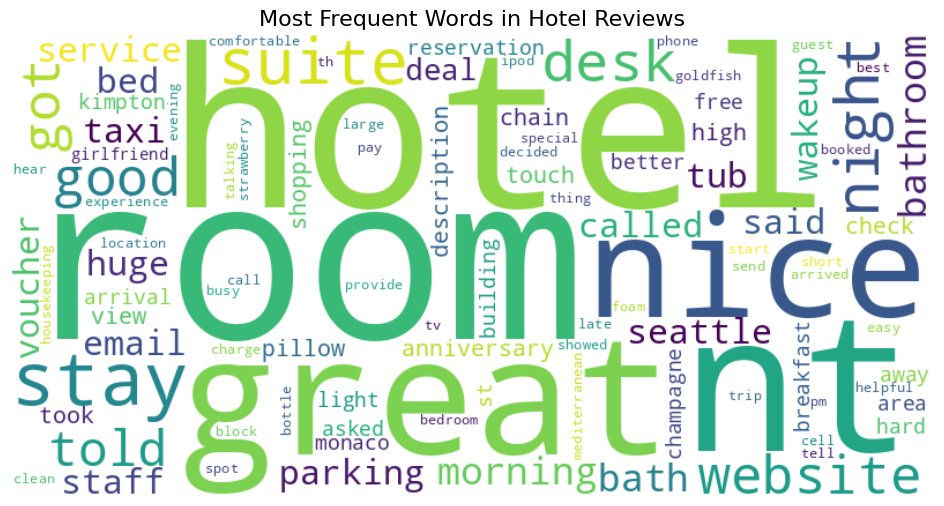

In [ ]:
##displaying the most frequently used words in the dataset
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize

all_text = ' '.join(final_cleaned)
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         max_words=100,
                         colormap='viridis',
                         contour_width=3).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in Hotel Reviews', fontsize=16)
    plt.show()
generate_wordcloud(all_text)

Top 20 Most Frequent Words

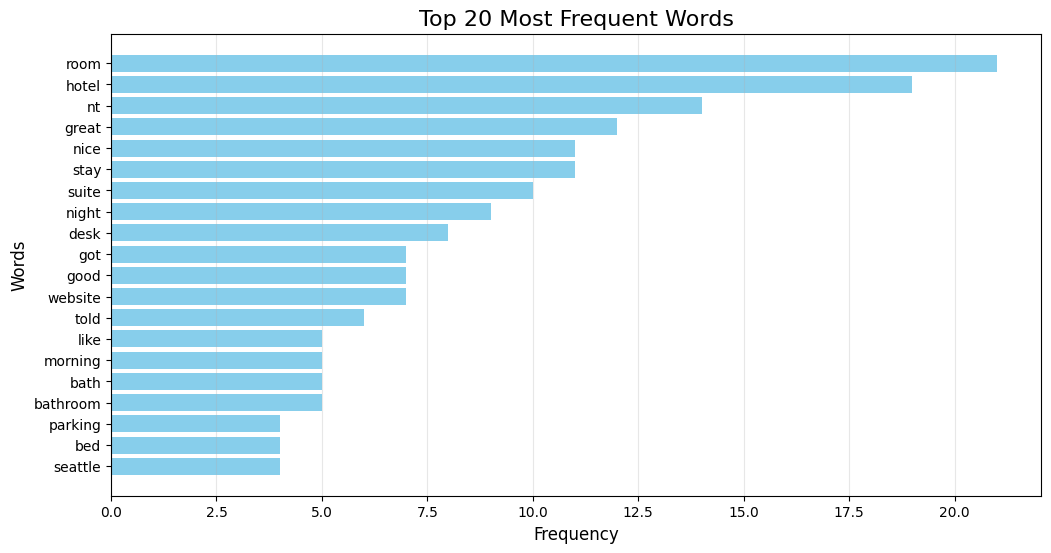

In [ ]:
def plot_top_words(text, n=20):
    words = word_tokenize(text)
    word_counts = Counter(words)

    top_words = word_counts.most_common(n)

    words = [word[0] for word in top_words]
    counts = [word[1] for word in top_words]

    plt.figure(figsize=(12, 6))
    plt.barh(words, counts, color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Top {n} Most Frequent Words', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.show()

plot_top_words(all_text)

Sentiment Distribution

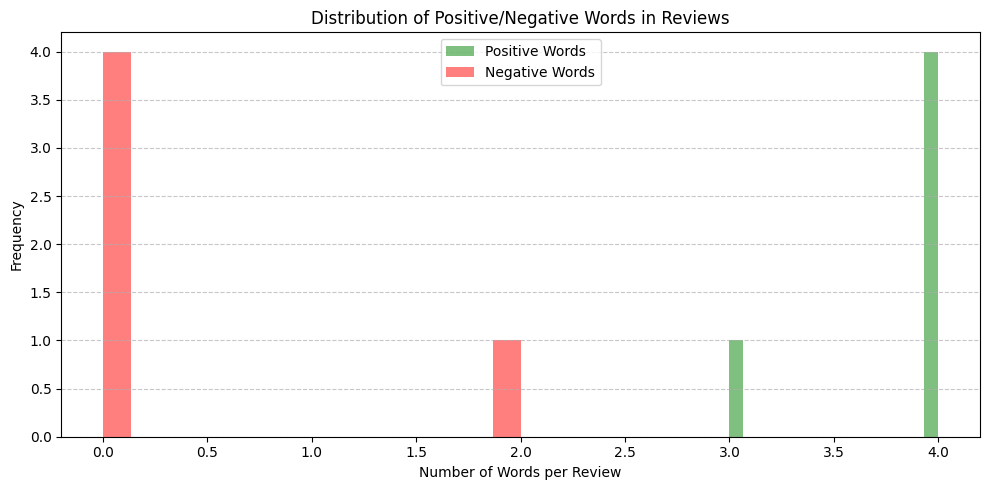

In [ ]:
df_cleaned = pd.DataFrame({'Cleaned_Review': final_cleaned})

def plot_sentiment_distribution(df):
    positive_words = ['good', 'great', 'excellent', 'nice', 'love',
                      'wonderful', 'amazing', 'perfect', 'happy', 'clean']
    negative_words = ['bad', 'poor', 'terrible', 'horrible', 'dirty',
                      'noisy', 'rude', 'disappointed', 'worst', 'uncomfortable']
    df['positive_count'] = df['Cleaned_Review'].apply(
        lambda x: sum(word in x.split() for word in positive_words))
    df['negative_count'] = df['Cleaned_Review'].apply(
        lambda x: sum(word in x.split() for word in negative_words))
    plt.figure(figsize=(10, 5))
    plt.hist(df['positive_count'], bins=15, alpha=0.5, label='Positive Words', color='green')
    plt.hist(df['negative_count'], bins=15, alpha=0.5, label='Negative Words', color='red')
    plt.title('Distribution of Positive/Negative Words in Reviews')
    plt.xlabel('Number of Words per Review')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(df_cleaned)

In [ ]:
# Importing a library to classify the text into polarity and subjectivity
from textblob import TextBlob

In [ ]:
#The polarity function is imported from textblob library. This function gives either the review is positive, negative, or neutral sentiment
def polarity(text):
    blob= TextBlob(text)
    blob.sentiment
    polarity= blob.sentiment.polarity

    return polarity

In [ ]:
#The subjectivity function is imported from textblob library. This function gives review of the opinion, emotions or personal viewpoints of customers.
def subjectivity(text):
    blob= TextBlob(text)
    blob.sentiment
    subjectivity= blob.sentiment.subjectivity

    return subjectivity

In [ ]:
# Creating two new columns and appending the calculated values from a scale of 0 -1
data['Polarity'] = data['Review'].apply(polarity)
data['Subjectivity'] = data['Review'].apply(subjectivity)
data

,Review,Rating,Polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,0.384615,0.629396
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,0.221729,0.508586
20487,great location price view hotel great quick pl...,4,0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,0.122573,0.533441


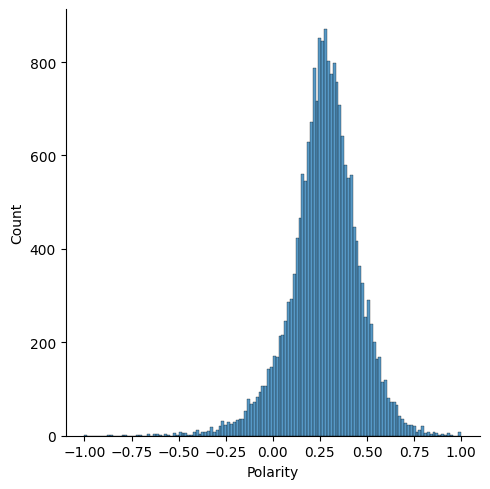

In [ ]:
# Displaying the Polarity column using a displot
sns.displot(data['Polarity'])

<Axes: xlabel='Rating', ylabel='Polarity'>

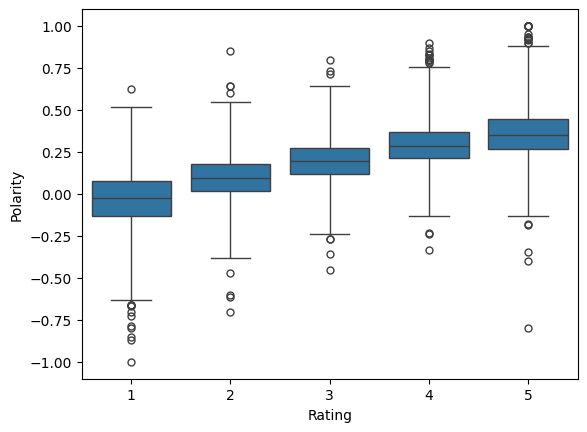

In [ ]:
# Displaying the Polarity against Rating in a boxplot
sns.boxplot(x='Rating',y='Polarity', data=data, whis=2.5, fliersize= 5)

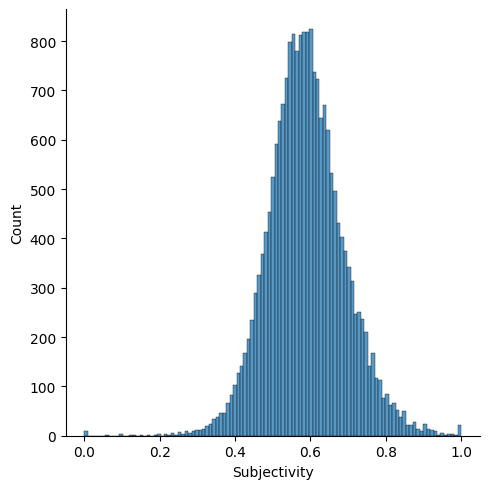

In [ ]:
# Displaying the Subjectivity column using a displot
sns.displot(data['Subjectivity'])

<Axes: xlabel='Rating', ylabel='Subjectivity'>

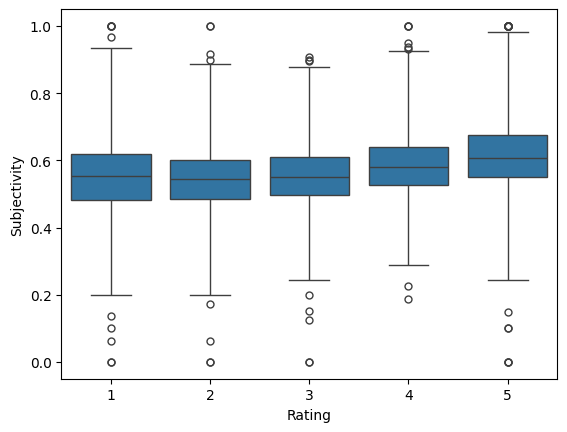

In [ ]:
# Displaying the Subjectivity against Rating in a boxplot
sns.boxplot(x='Rating',y='Subjectivity', data=data, whis=2.5, fliersize= 5)

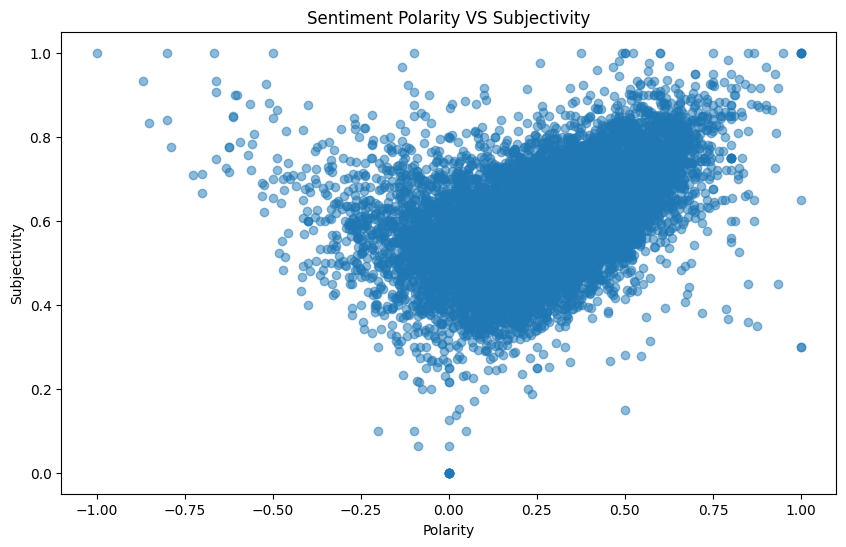

In [ ]:
# Plotting a scatter plot of Polarity against Subjectivity
plt.figure(figsize=(10,6))
plt.scatter(data['Polarity'], data['Subjectivity'],alpha=0.5)
plt.title('Sentiment Polarity VS Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Importing necessary libraries required for text preprocessing
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the necessary resources for text preprocessing
nltk.download('stopwords')
nltk.download('wordnet')

# Setting up list of stop-words. Here, out texts are in English vocubulary, so setting the language in English
stop_words = set(stopwords.words('english'))

# Initializing word lemmitizer
lemmatizer = WordNetLemmatizer()

# Now , building a function to removew stop words and lemmitizing the input data
def preprocess_text(text):
    # Tokenizing the input text
    words = word_tokenize(text)
    # Removing the stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Lemmitizing texts
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

# Applying the built function to the review and storing the output in a new column
data['Processed_Reviews'] = data['Review'].apply(preprocess_text)

# Displaying the updated dataframe
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Review  Rating  Polarity  \
0  nice hotel expensive parking got good deal sta...       4  0.208744   
1  ok nothing special charge diamond member hilto...       2  0.214923   
2  nice rooms not 4* experience hotel monaco seat...       3  0.294420   
3  unique, great stay, wonderful time hotel monac...       5  0.504825   
4  great stay great stay, went seahawk game aweso...       5  0.384615   

   Subjectivity                                  Processed_Reviews  
0      0.687000  nice hotel expensive parking got good deal sta...  
1      0.495009  ok nothing special charge diamond member hilto...  
2      0.605208  nice room 4 * experience hotel monaco seattle ...  
3      0.691228  unique , great stay , wonderful time hotel mon...  
4      0.629396  great stay great stay , went seahawk game awes...  


In [ ]:
# Now let up convert the words in out dataset into their root forms
# To do so, firstly importing necessarsy libraries
from nltk.stem import PorterStemmer
# The tqdm library is used for displaying the iteration process in a progress bar
from tqdm import tqdm

# Storing the PorterStemmer function into a variable
stemmer = PorterStemmer()

# Iterating through each words in the data["Processed_Reviews"] column
for i in tqdm(range(len(data))):
    # Storing the values of our column in a variable
    review = data['Processed_Reviews'][i]
    # Applying PorterStemmer() function to the stored variable and join the statements
    stemmed_review = ' '.join([stemmer.stem(word) for word in review.split()])
    # Now , updating our processed column
    data['Processed_Reviews'][i] = stemmed_review

Tokenization and Padding:

In [ ]:
# Importing necessary library for tokeninzing the text
from tensorflow.keras.preprocessing.text import Tokenizer
# Storing the Tokenizer function in a variable
tokenizer = Tokenizer()
# Applying the stored function to our column
tokenizer.fit_on_texts(data['Processed_Reviews'])

In [ ]:
# Let's see total number of unique words present in all the reveiws combined
vocab_size = len(tokenizer.word_index)

# tokeninzer.index_word is a dictonary which can be used to view all the unique words and there ID's.

print(f'There are total {vocab_size} unique words present')

There are total 42343 unique words present


In [ ]:
# Now let's replace each word in review with there respective token id
sequences = tokenizer.texts_to_sequences(data['Processed_Reviews'])

In [ ]:
indexing = tokenizer.word_index
indexing

{'hotel': 1,
 'room': 2,
 'stay': 3,
 'great': 4,
 "n't": 5,
 'good': 6,
 'staff': 7,
 'night': 8,
 'locat': 9,
 'day': 10,
 'nice': 11,
 'time': 12,
 'clean': 13,
 'servic': 14,
 'beach': 15,
 'walk': 16,
 'restaur': 17,
 'breakfast': 18,
 'place': 19,
 'food': 20,
 'like': 21,
 'resort': 22,
 'pool': 23,
 'help': 24,
 'bed': 25,
 'realli': 26,
 'love': 27,
 'th': 28,
 'area': 29,
 '2': 30,
 'bar': 31,
 'friendli': 32,
 'peopl': 33,
 'book': 34,
 'want': 35,
 'excel': 36,
 'small': 37,
 'recommend': 38,
 'check': 39,
 'littl': 40,
 'got': 41,
 'view': 42,
 'bathroom': 43,
 'look': 44,
 'best': 45,
 '5': 46,
 'make': 47,
 'minut': 48,
 'price': 49,
 'trip': 50,
 'use': 51,
 '3': 52,
 'floor': 53,
 'review': 54,
 'water': 55,
 'beauti': 56,
 'need': 57,
 'lot': 58,
 'comfort': 59,
 'arriv': 60,
 'enjoy': 61,
 'ask': 62,
 'drink': 63,
 'went': 64,
 'thing': 65,
 'return': 66,
 'tri': 67,
 'problem': 68,
 'desk': 69,
 'wonder': 70,
 'way': 71,
 'travel': 72,
 'right': 73,
 'say': 74,
 'wo

In [ ]:
# Setting up our maximum padding length
max_len = 100

In [ ]:
# Now to create a RNN-NLP model,each input should be equal in length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Any input with length more then 100 will have the extra word removed.
sequences_padded = pad_sequences(sequences,maxlen=max_len,padding='post')

In [ ]:
# Displaying the padded values
sequences_padded

array([[  11,    1,  193, ...,    0,    0,    0],
       [ 396,   24, 5587, ...,  811,    1,  574],
       [2892,  598,  115, ...,   55, 1591,   85],
       ...,
       [ 167,   44,   11, ...,    0,    0,    0],
       [4705,   91, 1598, ...,  350, 2940, 2317],
       [  33,  491,  210, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# Normalizing our values to 0-1 respectively
y = data['Rating'].apply(lambda x :1 if x > 4 else 0).values

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, y, test_size = 0.2, random_state = 42)

In [ ]:
# Importing all the libraries required to build our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     4,234,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,643,233 (17.71 MB)

 Trainable params: 4,643,233 (17.71 MB)

 Non-trainable params: 0 (0.00 B)

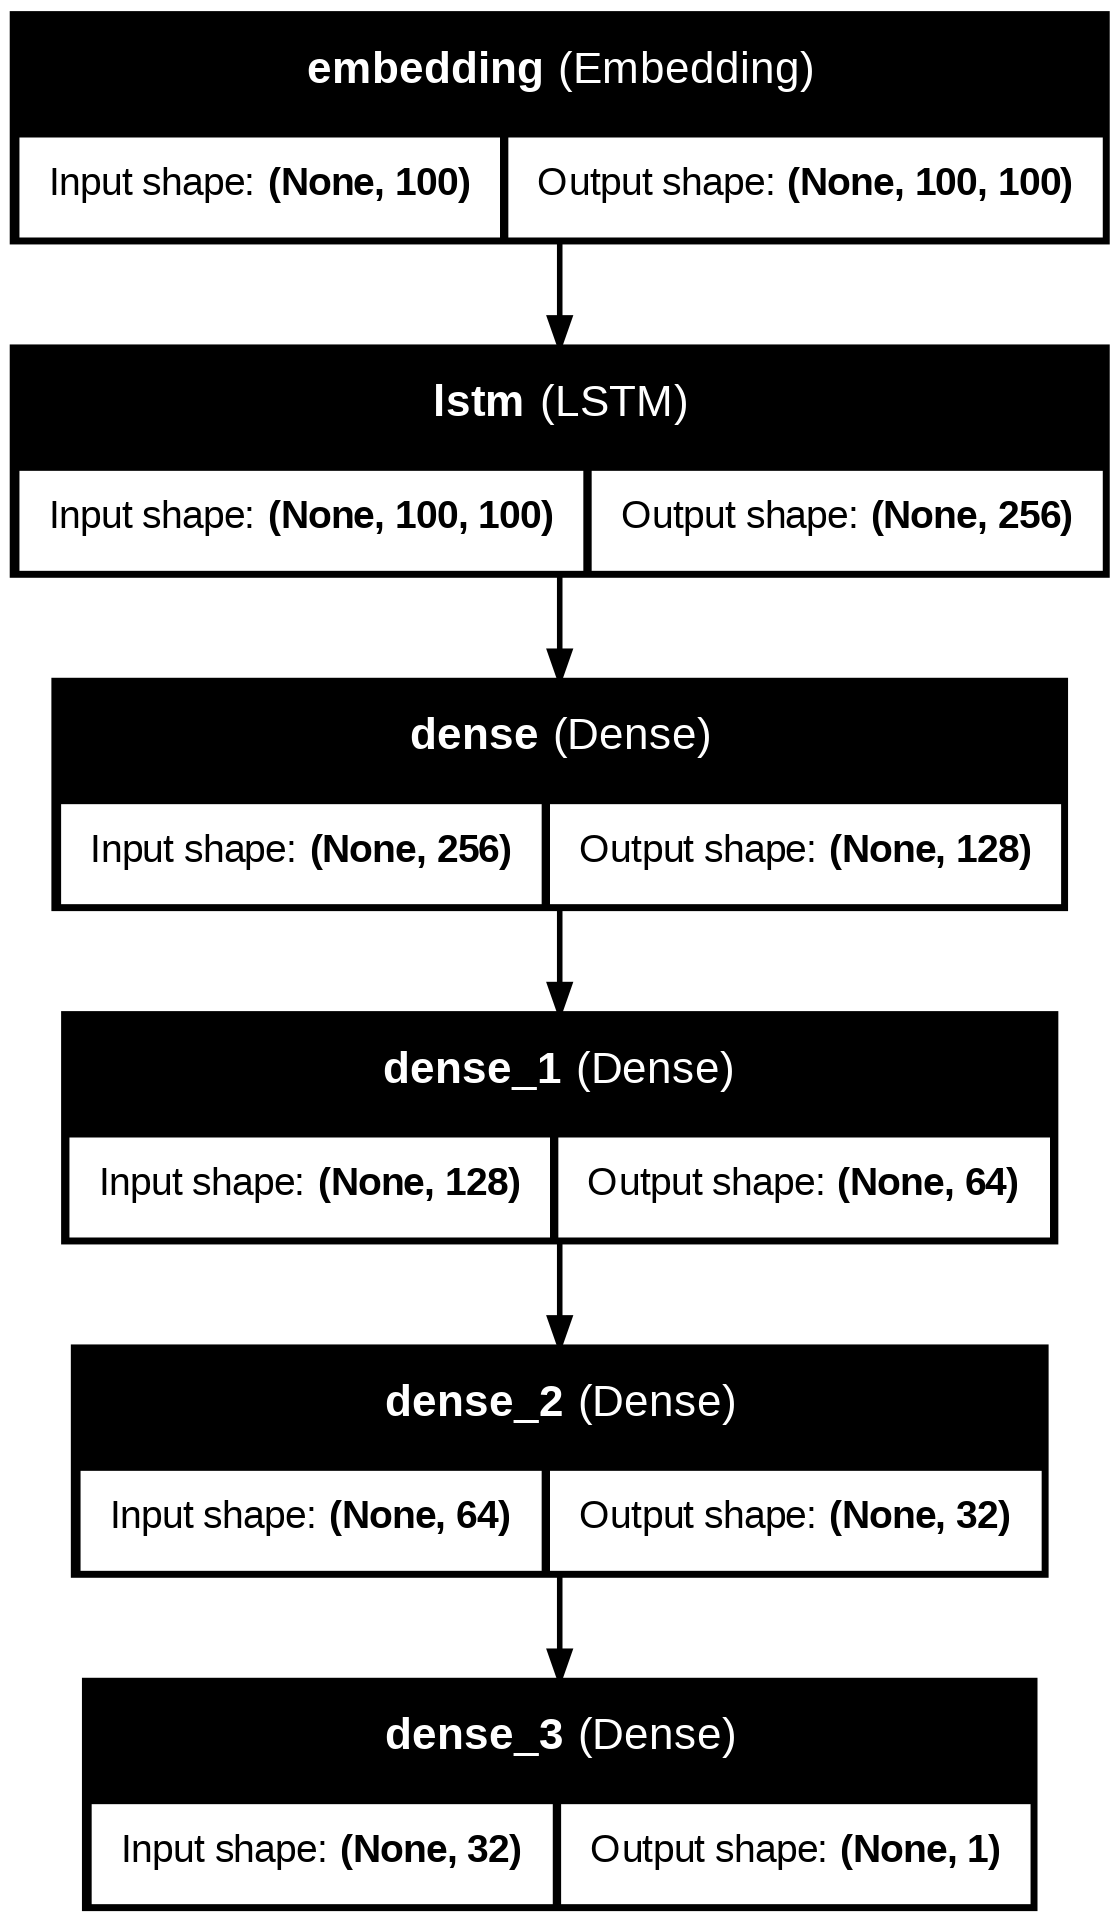

In [ ]:
  # Determining the embedding sizing
  embedding_size = 100
  # Calling the Sequential() function
  model = Sequential()
  # Adding all the necessary parameters to build out model
  model.add(Embedding(vocab_size+1,embedding_size,input_length = max_len))
  # Creating multiple RNN layers to pass our data
  model.add(LSTM(256,dropout = 0.5,recurrent_dropout = 0.5))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  #Adjusting the learning for better optimization
  initial_learning_rate = 0.001
  optimizer = Adam(learning_rate = initial_learning_rate)
  # Compiling our model with necessary optimizers , loss functions and metrices
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

  #Implementing a learning rate scheduler that adjusts our learining rate according to epochs
  def learning_rate_schedule(epoch , lr):
      if epoch < 10:
          return lr
      else:
          return lr * 0.1

  # Applying LearningRateScheduler to our function and storing into a variable
  lr_scheduler = LearningRateScheduler(learning_rate_schedule)

  # Displaying the model summary and plotting the model
  model.build(input_shape=(None, max_len))
  model.summary()
  plot_model(model , to_file='lstm_model.png' , show_shapes = True , show_layer_names = True)

In [ ]:
# Now after building our model , we need to train it
# Importing Early stopping as a necessary callback function
from keras.callbacks import EarlyStopping

# Applying earlystopping and storing it into a variable
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Now Fitting our model with the trained value
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64 , callbacks=[early_stopping,lr_scheduler])

Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.5605 - loss: 0.6825 - val_accuracy: 0.5748 - val_loss: 0.6588 - learning_rate: 0.0010
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.6632 - loss: 0.6276 - val_accuracy: 0.6748 - val_loss: 0.6053 - learning_rate: 0.0010
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.6639 - loss: 0.6063 - val_accuracy: 0.6955 - val_loss: 0.6020 - learning_rate: 0.0010
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.6990 - loss: 0.5826 - val_accuracy: 0.5836 - val_loss: 0.6594 - learning_rate: 0.0010
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.6708 - loss: 0.5707 - val_accuracy: 0.7438 - val_loss: 0.5309 - learning_rate: 0.0010
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.8180 - loss: 0.4163 - val_accuracy: 0.7629 - val_loss: 0.5207 - learning_rate: 0.0010
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.8568 - loss: 0.

In [24]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [25]:
# Saving the fitted model into a new .h5 file which could be used for further approach
model.save("/content/drive/MyDrive/Artificial Intelligence and machine learning/2. Hotel Review Dataset/model_trained.h5")


In [ ]:
# Printing the fitted model's result in our dataset
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.553746,0.674975,0.574774,0.658794,0.001
1,0.671913,0.625562,0.674799,0.605319,0.001
2,0.632443,0.623666,0.695535,0.602022,0.001
3,0.676122,0.593263,0.583557,0.659381,0.001
4,0.717972,0.535484,0.743840,0.530929,0.001


In [ ]:
accuracy = metrics['accuracy']
val_accuracy = metrics['val_accuracy']
val_loss = metrics['val_loss']
loss = metrics['loss']
print("Accuracy" , accuracy)
print("Validation Accuracy" , val_accuracy)
print("Loss",loss)
print("Validation Loss",val_loss)

Accuracy 0    0.553746
1    0.671913
2    0.632443
3    0.676122
4    0.717972
5    0.815825
6    0.860603
7    0.896535
8    0.920632
9    0.940520
Name: accuracy, dtype: float64
Validation Accuracy 0    0.574774
1    0.674799
2    0.695535
3    0.583557
4    0.743840
5    0.762869
6    0.762625
7    0.750915
8    0.743108
9    0.735545
Name: val_accuracy, dtype: float64
Loss 0    0.674975
1    0.625562
2    0.623666
3    0.593263
4    0.535484
5    0.415469
6    0.332006
7    0.263111
8    0.211320
9    0.166636
Name: loss, dtype: float64
Validation Loss 0    0.658794
1    0.605319
2    0.602022
3    0.659381
4    0.530929
5    0.520716
6    0.572901
7    0.610950
8    0.722460
9    0.824660
Name: val_loss, dtype: float64


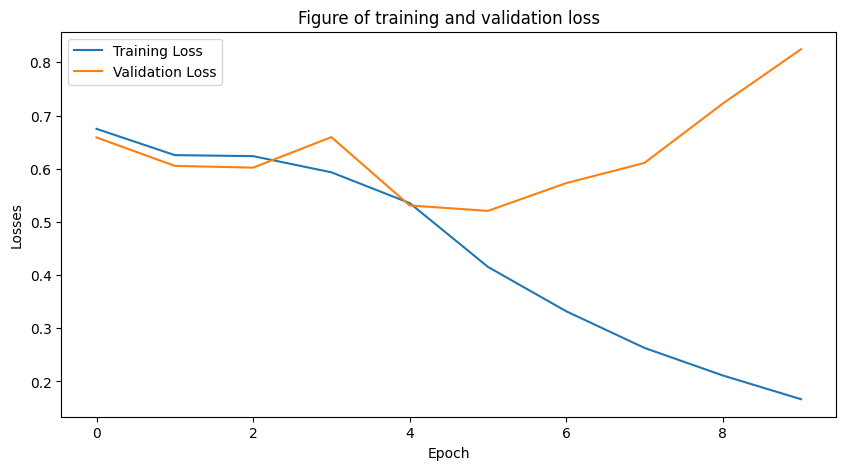

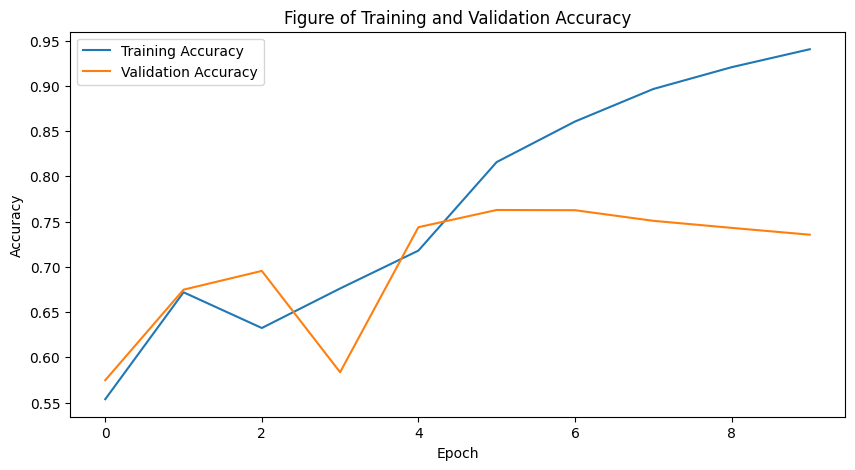

In [ ]:
from nltk.downloader import Label
# Plotting the output values

# First, plotting the training loss against validation loss
plt.figure(figsize=(10,5))
plt.plot(loss , label="Training Loss")
plt.plot(val_loss , label="Validation Loss")
plt.title("Figure of training and validation loss")
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.show()

# Second, plotting the training accuracy against validation accuracy
plt.figure(figsize=(10,5))
plt.plot(accuracy , label="Training Accuracy")
plt.plot(val_accuracy , label="Validation Accuracy")
plt.title("Figure of Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
# Importing library for accuracy score
from sklearn.metrics import accuracy_score

# Loading the saved model

model_load = load_model("/content/drive/MyDrive/Artificial Intelligence and machine learning/2. Hotel Review Dataset/model_trained.h5")

# Evaluating the model on validation data
loss, val_accuracy = model_load.evaluate(X_test, y_test)

# Printing the validation loss and accuracy after evaluation
print("Validation Loss:", loss)
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

# Making predictions and calculating accuracy manually
y_pred = model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {:.2f}%".format(accuracy * 100))

129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.7661 - loss: 0.5099
Validation Loss: 0.52071613073349
Validation Accuracy: 76.29%
129/129 ━━━━━━━━━━━━━━━━━━━━ 24s 177ms/step
Accuracy = 76.29%


In [ ]:
# Importing necessary libraries for roc_curve
from sklearn.metrics import roc_curve

# First, predicting the y_probability value
y_pred_prob = model_load.predict(X_test)
# Setting up required parameters to plot the diagram
fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob)

129/129 ━━━━━━━━━━━━━━━━━━━━ 23s 177ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

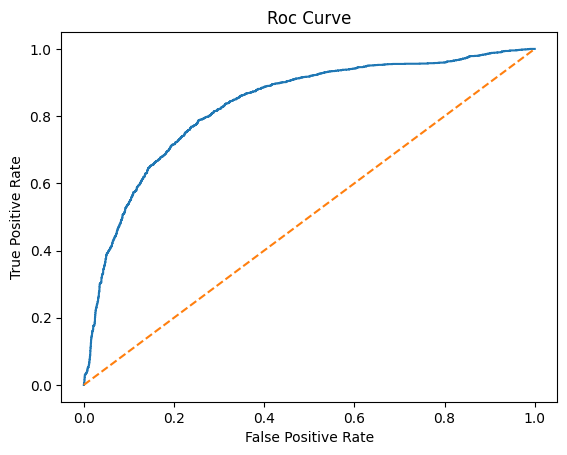

In [ ]:
# Plotting the diagram based on False Positive Rate and True Positive Rate
plt.plot(fpr,tpr)
# Setting up the plots and labelling the diagram
plt.plot([0,1] , [0,1] , linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Roc Curve')
plt.show

In [ ]:
# Lets us display the roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculating the roc-auc score and displaying
score = roc_auc_score(y_test , y_pred_prob)
print("AUC Score:" , score)

AUC Score: 0.8315135575873859


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
matrix = confusion_matrix(y_test , y_pred)

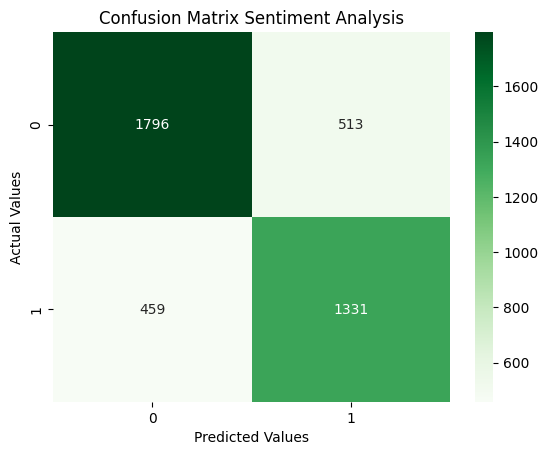

In [ ]:
# Printing the confusion matrix by setting up variables.
sns.heatmap(matrix , annot =True , fmt = "d" , cmap = "Greens")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix Sentiment Analysis")
plt.show()

In [ ]:
# Running the tokenizer function and fitting the tokenizer into the data column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Reviews'])


# Creating a list of objects to feed into the trained model
input_texts = [
    "nice hotel not nice staff",
    "ok nothing special",
    "good hotel good environment"
]

#Tokenzing and padding the input object for processing
input_tokenized = tokenizer.texts_to_sequences(input_texts)
input_padded = pad_sequences(input_tokenized, maxlen=max_len, padding='post')

# Predicting the sentiments using the fed input
input_predict = model_load.predict(input_padded)

#Setting up a custom threshold
threshold = 0.5

# Converting probabilities to binary values
input_predict_binary = (input_predict > 1-threshold).astype('int32')

#Finally, displaying the sentiment prediction value
for i in range(len(input_texts)):
    print("Input Text:", input_texts[i])
    # applying conditionals to print sentiment prediction values
    print("Binary Prediction:", "Positive" if input_predict_binary[i][0] == 1 else "Negative")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Input Text: nice hotel not nice staff
Binary Prediction: Negative

Input Text: ok nothing special
Binary Prediction: Negative

Input Text: good hotel good environment
Binary Prediction: Negative



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming data['Processed_Reviews'] still contains your preprocessed text

# 1. Re-fit tokenizer with the intended vocabulary size
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary to 10000 words
tokenizer.fit_on_texts(data['Processed_Reviews'])

# 2. Recreate sequences using the new tokenizer
sequences = tokenizer.texts_to_sequences(data['Processed_Reviews'])

# 3. Pad sequences (if necessary)
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 100  # Adjust if needed
sequences_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# 4. Redo train-test split with the updated sequences
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Hyperparameters (vocab_size is now consistent with tokenizer)
vocab_size = len(tokenizer.word_index) + 1 # add 1 to vocabulary
embedding_dim = 100
max_length = 100  # Adjust if needed

# Simple RNN model with trainable embedding
model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    SimpleRNN(units=64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.build(input_shape=(None, max_length))
model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     4,234,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,245,025 (16.19 MB)

 Trainable params: 4,245,025 (16.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history_rnn = model_rnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.5395 - loss: 0.6896 - val_accuracy: 0.5608 - val_loss: 0.6777
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.6270 - loss: 0.6312 - val_accuracy: 0.5371 - val_loss: 0.7011
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.7161 - loss: 0.4837 - val_accuracy: 0.5374 - val_loss: 0.7789
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.7685 - loss: 0.3974 - val_accuracy: 0.5172 - val_loss: 0.8946


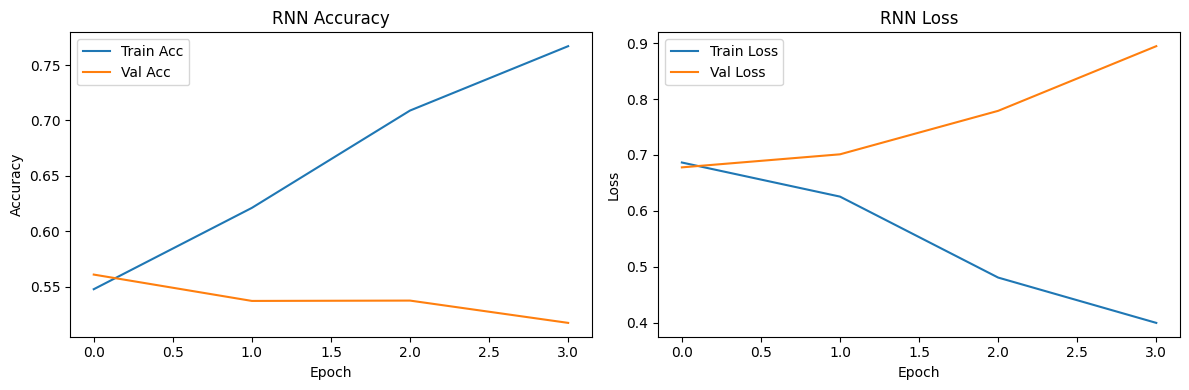

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_rnn, "RNN")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")

test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test)
print(f"Test Accuracy (RNN): {test_accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix (RNN):")
print(confusion_matrix(y_test, y_pred_rnn))
print("Classification Report (RNN):")
print(classification_report(y_test, y_pred_rnn))

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5350 - loss: 0.6826
Test Accuracy (RNN): 0.5484
Confusion Matrix (RNN):
[[1506  803]
 [1048  742]]
Classification Report (RNN):
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      2309
           1       0.48      0.41      0.44      1790

    accuracy                           0.55      4099
   macro avg       0.53      0.53      0.53      4099
weighted avg       0.54      0.55      0.54      4099



3. Model no.3


In [ ]:
!pip install numpy==1.23.5
!pip install gensim
!pip install jax==0.4.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have num

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: Operation cancelled by user
^C
^C


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn gensim tensorflow openpyxl

In [ ]:
!pip uninstall -y scipy scikit-learn
!pip install numpy==1.24.4 scipy==1.10.1 scikit-learn==1.2.2

In [ ]:
!pip install tensorflow==2.12.0

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import gensim.downloader as api
import matplotlib.pyplot as plt

Again loading the dataset

In [ ]:
df = "/content/drive/MyDrive/Artificial Intelligence and machine learning/2. Hotel Review Dataset/Hotel_Reviews.csv"

In [ ]:
data = pd.read_csv(df)

In [ ]:
data.head

<bound method NDFrame.head of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [ ]:
data.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data['Review'] = data['Review'].str.lower().str.strip()

In [ ]:
data['Rating'] = data['Rating'].astype(int)

In [ ]:
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
X = data['Review'].values
y = data['Sentiment'].values

In [ ]:
#Splitting the review and sentiment into train test model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [ ]:
embeddingmodel = api.load('glove-wiki-gigaword-50')
embedding_dim = 50

In [ ]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in embeddingmodel:
        embedding_vector = embeddingmodel[word]
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))  # freeze pretrained vectors
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 50)        │     2,330,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,277 (9.24 MB)

 Trainable params: 91,777 (358.50 KB)

 Non-trainable params: 2,330,500 (8.89 MB)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train_pad, y_train,
                    epochs=15,
                    validation_split=0.2,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 62s 145ms/step - accuracy: 0.7306 - loss: 0.5697 - val_accuracy: 0.7402 - val_loss: 0.5714
Epoch 2/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 80s 139ms/step - accuracy: 0.7387 - loss: 0.5517 - val_accuracy: 0.7389 - val_loss: 0.4974
Epoch 3/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.7652 - loss: 0.5025 - val_accuracy: 0.7460 - val_loss: 0.5306
Epoch 4/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.7335 - loss: 0.5464 - val_accuracy: 0.7658 - val_loss: 0.5183
Epoch 5/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - accuracy: 0.7684 - loss: 0.5113 - val_accuracy: 0.7707 - val_loss: 0.4687
Epoch 6/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.8093 - loss: 0.4167 - val_accuracy: 0.8442 - val_loss: 0.3652
Epoch 7/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 81s 139ms/step - accuracy: 0.8562 - loss: 0.3436 - val_accuracy: 0.8554 - val_loss: 0.3397
Epoch 8/15
410/410 ━━━━━━━━━━━━━━━━━━━━ 58s 143ms/step - accuracy: 0.8653 - loss: 0

In [17]:
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix & Report
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

129/129 [==============================] - 6s 48ms/step - loss: 0.2935 - accuracy: 0.8705
Test Accuracy: 0.8705
129/129 [==============================] - 8s 54ms/step
[[ 694  363]
 [ 168 2874]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.72      1057
           1       0.89      0.94      0.92      3042

    accuracy                           0.87      4099
   macro avg       0.85      0.80      0.82      4099
weighted avg       0.87      0.87      0.87      4099



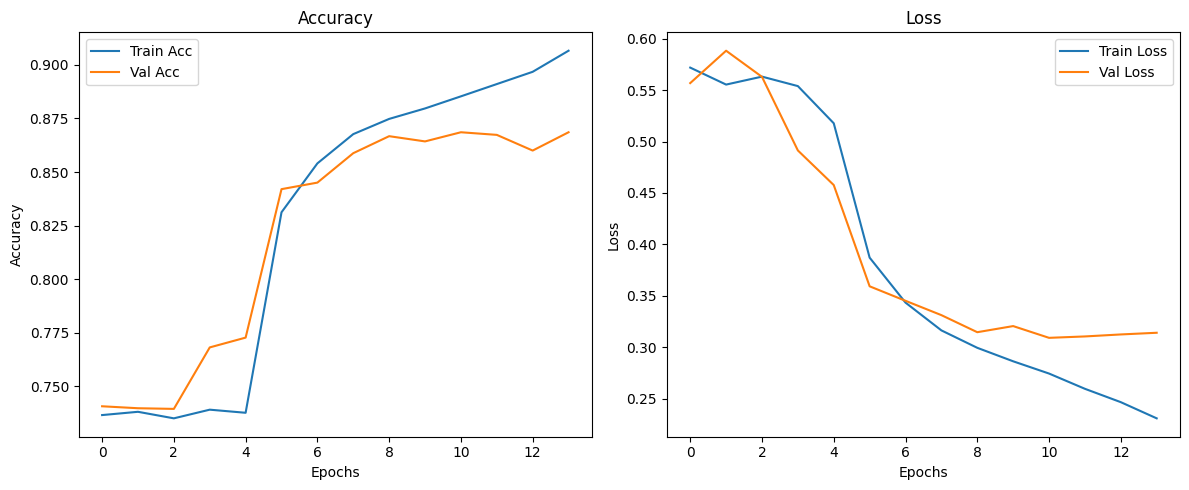

In [18]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Gradio GUI

In [ ]:
!pip install gradio

In [20]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [22]:
pip install tensorflow==2.11.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11.0


In [26]:
model = load_model("/content/drive/MyDrive/Artificial Intelligence and machine learning/2. Hotel Review Dataset/model_trained.h5")

# Load tokenizer and max_length used during training
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

max_length = 100  # Set this to the value used in your training script

# Prediction function
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)
    prediction = model.predict(padded)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Create Gradio Interface
interface = gr.Interface(fn=predict_sentiment, inputs="text", outputs="text", title="Tweet Sentiment Classifier")
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://988d80f32306247920.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
